In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/egy-proverbs/FinalCollectedData.tsv


# Start Reading the egy-proverbs Corpus

In [2]:
#Reading the text file
import pandas as pd
import json
cp = pd.DataFrame(columns=['Text'])
cp['Text'] = pd.read_csv("/kaggle/input/egy-proverbs/FinalCollectedData.tsv" , sep='\t')
text = cp['Text'].to_numpy()
text

array(['التحسبه موسي يطلع فرعون', 'اللي تحسبه موسي يطلع فرعون',
       'اللي تحسبه موسى، يطلع فرعون', ..., 'خد صاحبك على عيبه',
       'يا مصبر الوحش علي الجحش',
       'اللي عندوا قرش محيروا يجيب حمام ويطيروا'], dtype=object)

# Text Cleaning & Preprocessing

## Removing Duplicated Text

In [3]:
#Removing Duplicated Proverbs
list_of_texts = text.tolist()
print(len(text))
set_of_texts = list(set(list_of_texts))
print(len(set_of_texts))
set_of_texts[:20]

4204
1729


['يا داخل بين البصله وقشرتها ما ينوبك غير ريحتها',
 'تروح فين الشمس من ع قفا الفلاح',
 'اقلب القدره علي فمها تطلع البت لامها',
 'لسانك حصانك إن صنته صانك و إن خنته خانك',
 'كلام الليل مدهون بزبدة يطلع عليه النهاريسيح',
 'اللى يحط راسه فى الحبل كل الناس تجره',
 'إن فاتتك فرصة، روح نام',
 'يا واخد القرد على ماله بكرا يروح المال ويبقى القرد على حاله',
 'صباح الخير يا جاري انت ف حالك وانا ف حالي',
 'ايد لوحدها ما تسقفش',
 'الغزالة الشاطرة تغزل برجل حمار',
 'الكدب ملوش رجلين',
 'ضربني و بكي سبقني و اشتكي',
 'البيت بيت ابونا ويجيو الغرب يطردونا',
 'حسدوا الغجر على ضل الشجر',
 'اللى عنده قرش ومحيرة يجيب حمام ويطيره',
 'اخطب لبنتك ولا تخطبش لابنك',
 'قال جيت أبيعك ياحنه كترت الاحزان',
 'أبو بلاش كتر منه',
 'الي قد الكحل يتكحل']

## Text Cleaning

In [4]:
# Try to clean text (Stemming - Lemmatization - removing stopwords - punctuations) 
# in order to detect duplicated texts with different forms

#first, tokenizing each text
from nltk.tokenize import word_tokenize
tokenized_text = []
for sen in set_of_texts:
    tokenized_text.append(word_tokenize(sen))
    
#Removing Stopwords
from nltk.corpus import stopwords
arabic_stop_words = stopwords.words('arabic')
for sen in tokenized_text:
    for tkn in sen:
        if tkn in arabic_stop_words:
            sen.pop(sen.index(tkn))

#Removing Punctuations
from string import punctuation
for sen in tokenized_text:
    for tkn in sen:
        if tkn in punctuation:
            sen.pop(sen.index(tkn))

# #Lemmatization
# from nltk.stem import WordNetLemmatizer
# lemmat = WordNetLemmatizer()
# for sen in tokenized_text:
#     for i in range(len(sen)):
#         sen[i] = lemmat.lemmatize(sen[i])
            

# #Stemming
# from nltk.stem import ISRIStemmer
# stemming = ISRIStemmer()
# for sen in tokenized_text:
#     for i in range(len(sen)):
#         sen[i] = stemming.stem(sen[i])

##Additional Cleaning

import re
#Removing Arabic Diacritics
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text

for sen in tokenized_text:
    for i in range(len(sen)):
        sen[i] = remove_diacritics(sen[i])
        
#Normalizing
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    return text

for sen in tokenized_text:
    for i in range(len(sen)):
        sen[i] = normalize_arabic(sen[i])
        
#Removing Unnecessary Sympol/Punctuation that hasn't removed
def removing_unnecessary(text):
    text = re.sub("[.،`😢'•_؟$»؛]+","",text)
    return text
for sen in tokenized_text:
    for i in range(len(sen)):
        sen[i] = removing_unnecessary(sen[i])
        
tokenized_text[:100]

[['داخل', 'البصله', 'وقشرتها', 'ينوبك', 'ريحتها'],
 ['تروح', 'فين', 'الشمس', 'ع', 'قفا', 'الفلاح'],
 ['اقلب', 'القدره', 'علي', 'فمها', 'تطلع', 'البت', 'لامها'],
 ['لسانك', 'حصانك', 'صنته', 'صانك', 'ان', 'خنته', 'خانك'],
 ['كلام', 'الليل', 'مدهون', 'بزبده', 'يطلع', 'النهاريسيح'],
 ['اللي', 'يحط', 'راسه', 'في', 'الحبل', 'الناس', 'تجره'],
 ['فاتتك', 'فرصه', 'روح', 'نام'],
 ['واخد', 'القرد', 'ماله', 'بكرا', 'يروح', 'المال', 'ويبقي', 'القرد', 'حاله'],
 ['الخير', 'جاري', 'انت', 'حالك', 'وانا', 'حالي'],
 ['ايد', 'لوحدها', 'تسقفش'],
 ['الغزاله', 'الشاطره', 'تغزل', 'برجل', 'حمار'],
 ['الكدب', 'ملوش', 'رجلين'],
 ['ضربني', 'بكي', 'سبقني', 'اشتكي'],
 ['البيت', 'بيت', 'ابونا', 'ويجيو', 'الغرب', 'يطردونا'],
 ['حسدوا', 'الغجر', 'ضل', 'الشجر'],
 ['اللي', 'عنده', 'ومحيره', 'يجيب', 'حمام', 'ويطيره'],
 ['اخطب', 'لبنتك', 'تخطبش', 'لابنك'],
 ['قال', 'جيت', 'ابيعك', 'ياحنه', 'كترت', 'الاحزان'],
 ['بلاش', 'كتر'],
 ['الي', 'الكحل', 'يتكحل'],
 ['التاني', 'السلامه'],
 ['زي', 'العقربه', 'قرصتها', 'والقبر'],
 ['خ

In [5]:
#Reassembling sentences
for i in range(len(tokenized_text)):
    tokenized_text[i] = " ".join(tokenized_text[i])
    
tokenized_text[:21]

['داخل البصله وقشرتها ينوبك ريحتها',
 'تروح فين الشمس ع قفا الفلاح',
 'اقلب القدره علي فمها تطلع البت لامها',
 'لسانك حصانك صنته صانك ان خنته خانك',
 'كلام الليل مدهون بزبده يطلع النهاريسيح',
 'اللي يحط راسه في الحبل الناس تجره',
 'فاتتك فرصه روح نام',
 'واخد القرد ماله بكرا يروح المال ويبقي القرد حاله',
 'الخير جاري انت حالك وانا حالي',
 'ايد لوحدها تسقفش',
 'الغزاله الشاطره تغزل برجل حمار',
 'الكدب ملوش رجلين',
 'ضربني بكي سبقني اشتكي',
 'البيت بيت ابونا ويجيو الغرب يطردونا',
 'حسدوا الغجر ضل الشجر',
 'اللي عنده ومحيره يجيب حمام ويطيره',
 'اخطب لبنتك تخطبش لابنك',
 'قال جيت ابيعك ياحنه كترت الاحزان',
 'بلاش كتر',
 'الي الكحل يتكحل',
 'التاني السلامه']

In [6]:
#Convert the texts to DataFrame
texts = pd.DataFrame(tokenized_text,columns=['Text'])
texts

,Text
0,داخل البصله وقشرتها ينوبك ريحتها
1,تروح فين الشمس ع قفا الفلاح
2,اقلب القدره علي فمها تطلع البت لامها
3,لسانك حصانك صنته صانك ان خنته خانك
4,كلام الليل مدهون بزبده يطلع النهاريسيح
...,...
1724,الصديق وقت الضيق
1725,زي الفراخ تبيض وتحزق للتاجر
1726,ارميه في السطوح وان لك خير يروح
1727,اللي متحتاجش لوشه انهارده بكره تحتاح لقفاه


# Training the K-Means Model

## Text Vectorizing

In [7]:
#Vectorizing the Text using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tf_idf = TfidfVectorizer(ngram_range=(1,1),tokenizer= tokenizer.tokenize)
X_train = tf_idf.fit_transform(tokenized_text)

X_train

<1729x2757 sparse matrix of type '<class 'numpy.float64'>'
	with 8837 stored elements in Compressed Sparse Row format>

## Model Training & Hypterparameter Tuning

In [8]:
#Train the model on K-Means for different values of N Cluster -1 to 10- (HyperParameters Tuning)
from sklearn.cluster import KMeans
clusters = range(1,31)
sum_of_squared_errors = []
for clst in clusters:
    model = KMeans(n_clusters=clst,init="k-means++")
    model.fit(X_train)
    sum_of_squared_errors.append(model.inertia_)

# Prediction & Analysis

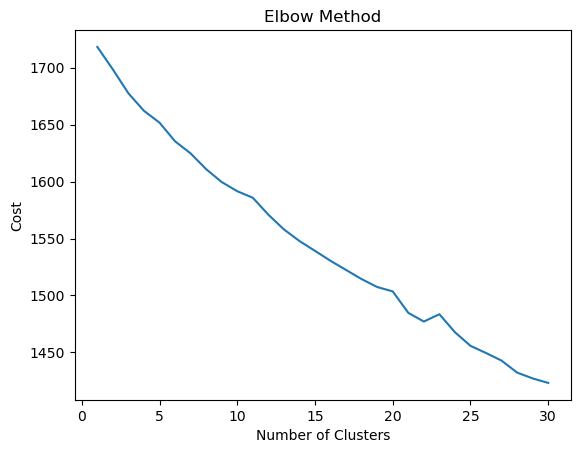

In [9]:
#Plotting the (Elbow method) to determine best value of N Clusters
import matplotlib.pyplot as plt
plt.plot(clusters,sum_of_squared_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.title("Elbow Method")
plt.show()

In [10]:
#Train the model on 30 Cluster for best result and make prediction
model = KMeans(n_clusters=30,init="k-means++")
model.fit(X_train)
predicted_label = model.predict(X_train)
set_of_texts = pd.DataFrame(set_of_texts,columns=['Text'])
set_of_texts['cluster'] = predicted_label

In [11]:
print("Number of Samples:",len(set_of_texts))
print(set_of_texts.cluster.value_counts())

Number of Samples: 1729
0     996
11    151
18     48
17     40
25     35
8      29
22     28
14     25
12     24
27     24
20     23
24     21
29     21
26     20
9      20
5      19
10     19
19     19
4      19
1      18
6      18
23     17
13     17
21     16
28     12
3      12
15     11
16     10
7       9
2       8
Name: cluster, dtype: int64


In [12]:
#Getting some samples
set_of_texts[set_of_texts['cluster'] == 1]

,Text,cluster
36,ادى العيش لخبازه,1
362,""" ادي العيش لخبازه """,1
387,ادي العيش لخبازه و لو كل نصه,1
454,إدي العيش لخبازه,1
507,أدى العيش لخبازه و لو أكل نصه,1
616,اعطي العيش لخبازه ولو كل نصفه,1
955,• إدي العيش لخبازه، ولو أكل نصه,1
1042,ادي العيش لخبازه ولو اكل نصه,1
1066,ادي العيش لخبازه، ولو أكل نصفه,1
1151,إدي العيش لخبازه ولو أكل نصه,1


In [13]:
set_of_texts[set_of_texts['cluster'] == 3]

,Text,cluster
143,علمناهم الشحاتة سبقونا علي الأبواب,3
246,علمناهم الشحاته سبقونا عالابواب,3
438,علمناهم الشحاتة سبقونا ع الأبواب,3
465,علمناهم الشحاته سبقونا على الأبواب,3
610,علمناهم الشحاته سبقونا علي الابواب,3
641,علمناهم الشحاته سبقونا ع الأبواب,3
710,علمناهم الشحاته سبقونا على الابواب,3
801,علمناهم الشحاته سبقونا ع الابواب,3
978,علمناهم الشحاتة سبقونا على الأبواب,3
1067,علمناهم الشحاته سبقونا علي الأبواب,3


In [14]:
set_of_texts[set_of_texts['cluster'] == 4]

,Text,cluster
62,القرد بعين أمه غزال,4
243,الي الدنيا علمته مش زي الي أمه مرجحته,4
245,القرد في عين أمه غزال,4
247,القرد ف عين أمه غزال,4
279,القرد ف عينه أمه غزال,4
434,القرد فعين امة غزال,4
471,اللي الدنيا علمته مش زى اللي أمه مرجحته,4
763,القرد فى عين امة غزال,4
924,القرد في عين أمه غرال,4
1144,الي الدنيا علميته مش زي الي امة مرجحته,4


In [15]:
set_of_texts[set_of_texts['cluster'] == 21]

,Text,cluster
92,اللي تحسبه موسى يطلع فرعون,21
131,اللي تحسبه موسى ، يطلع فرعون,21
314,الي تحسبه موسي يطلع فرعون,21
359,اكسر للبنت ضلع يطلع لها أربعة وعشرين,21
371,اللي تحسبه موسى، يطلع فرعون,21
403,التحسبه موسي يطلع فرعون,21
423,افتكرناه موسى طلع فرعون,21
563,اللي تحسبه موسي يطلع فرعون,21
625,اكسر للبنت ضلع يطلع لها اربعه وعشرين,21
771,اللي تفتكره موسى يطلع فرعون,21


In [16]:
#To Represent the texts' clusters , we want to reduce dimensions (Optional)
import numpy as np
from sklearn.manifold import TSNE
everything = np.concatenate((X_train.todense(),model.cluster_centers_))
everything = np.asarray(everything)

tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 10
model_d = TSNE(n_components=2, random_state= 1, init=tsne_init,
    perplexity=tsne_perplexity,
    early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_everything = model_d.fit_transform(everything)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


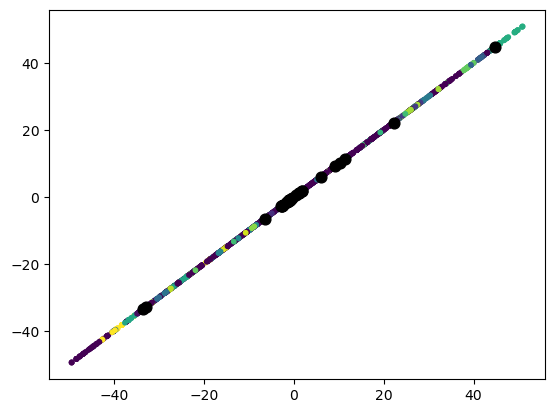

In [17]:
#Plotting the Clusters with Centroids
plt.scatter(transformed_everything[:-30,0],transformed_everything[:-30,0],c=predicted_label,s=10)
plt.scatter(transformed_everything[-30:,0],transformed_everything[-30:,0],c='black',s=60)
plt.show()